In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [31]:
df= pd.read_csv('exams.csv')

In [32]:

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [33]:
df.shape

(1000, 8)

## Description :

• Gender: The gender of the student (male/female)

• Race/ethnicity: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)

• Parental level of education: The highest level of education attained by the student's parent(s) or guardian(s)

• Lunch: Whether the student receives free or reduced-price lunch (yes/no)

• Test preparation course: Whether the student completed a test preparation course (yes/no)

• Math score: The student's score on a standardized mathematics test

• Reading score: The student's score on a standardized reading test

• Writing score: The student's score on a standardized writing test

# 3. Data Checks to perform

 1. Check Missing values
 2. Check Duplicates
 3. Check Data type
 4. Check the number of unique values of each column
 5. Check statistics of data set
 6. Check various categories present in the different categorical column


In [34]:
## 3.1 check for missing values

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set

In [35]:
## 3.2 check for duplicates

df.duplicated().sum()

0

there are no duplicates values in the data set

In [36]:
## 3.3 check data types

df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [37]:
# 3.4 check for unique values

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [38]:
## 3.5 check statistical summary

df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


Insight :

From above description we can see all mean values are in the same range - between 67.8 and 70.3

all standart deviations are also  between 14 and 15.2, which means 

We can see reading  minimal score is the highest of all scores, but the percentiles are smoothly spreaded.

In [39]:
# define numerical and categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Numerical Features:', numerical_features)
print('Categorical Features:', categorical_features)

Numerical Features: ['math score', 'reading score', 'writing score']
Categorical Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding columns for "Total Score " and "Average Score"

In [40]:
df['Total_Score'] = df['math score'] + df['reading score'] + df['writing score']
df["Average_Score"] = df["Total_Score"]/3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_Score
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667
...,...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,225,75.000000
996,male,group C,some college,standard,none,80,66,66,212,70.666667
997,female,group A,high school,standard,completed,67,86,86,239,79.666667
998,male,group E,high school,standard,none,80,72,62,214,71.333333


Histogram and KDE

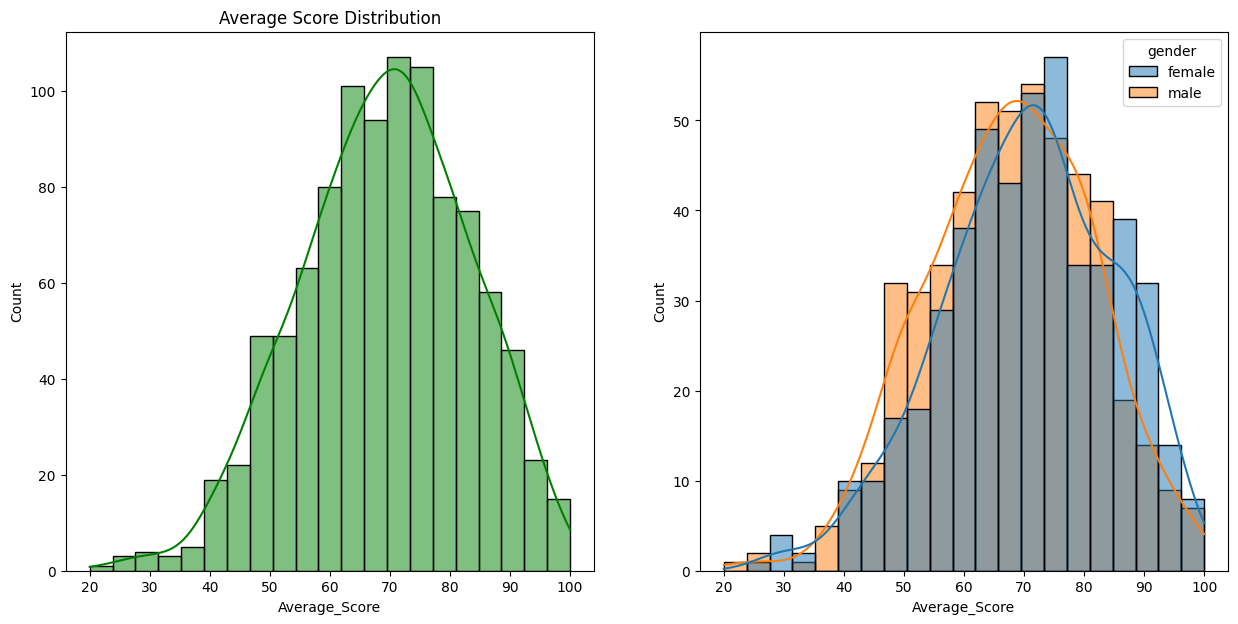

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['Average_Score'], kde=True, color='green')
plt.title('Average Score Distribution')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Average_Score', kde=True, hue='gender')
plt.show()

Female students performs better then male students

Text(0.5, 1.0, 'Average Score Distribution by Lunch for male')

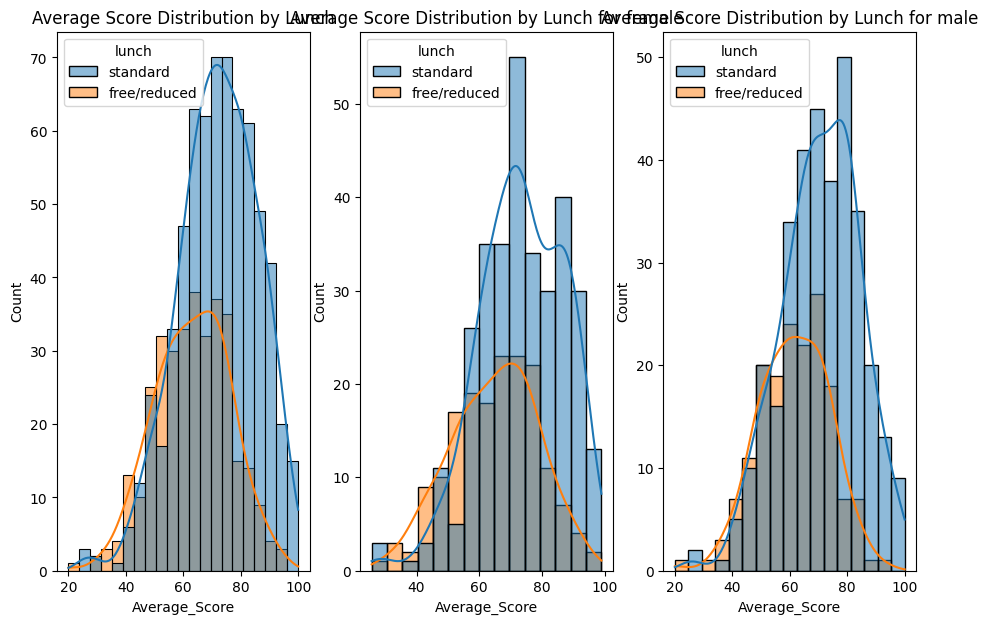

In [42]:
plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(1, 4, 1)
sns.histplot(data=df, x='Average_Score', kde=True, hue='lunch')
plt.title('Average Score Distribution by Lunch')
plt.subplot(1, 4, 2)
sns.histplot(data=df[df['gender'] == 'female'], x='Average_Score', kde=True, hue='lunch')
plt.title('Average Score Distribution by Lunch for female')
plt.subplot(1, 4, 3)
sns.histplot(data=df[df['gender'] == 'male'], x='Average_Score', kde=True, hue='lunch')
plt.title('Average Score Distribution by Lunch for male')

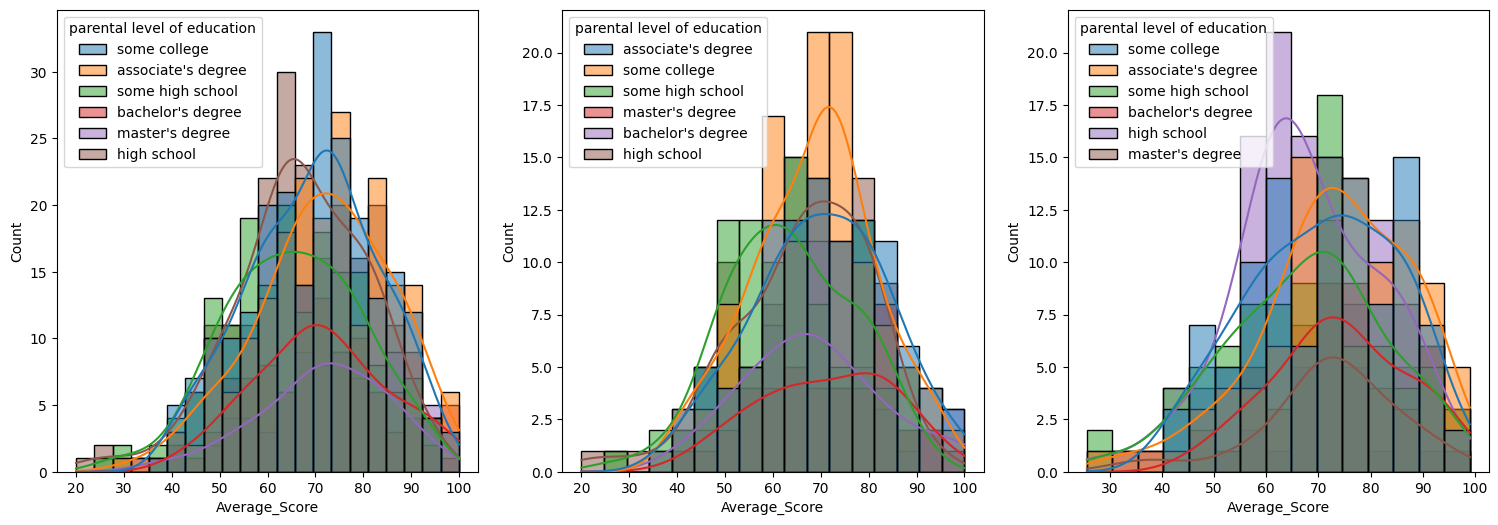

In [43]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average_Score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average_Score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average_Score',kde=True,hue='parental level of education')
plt.show()

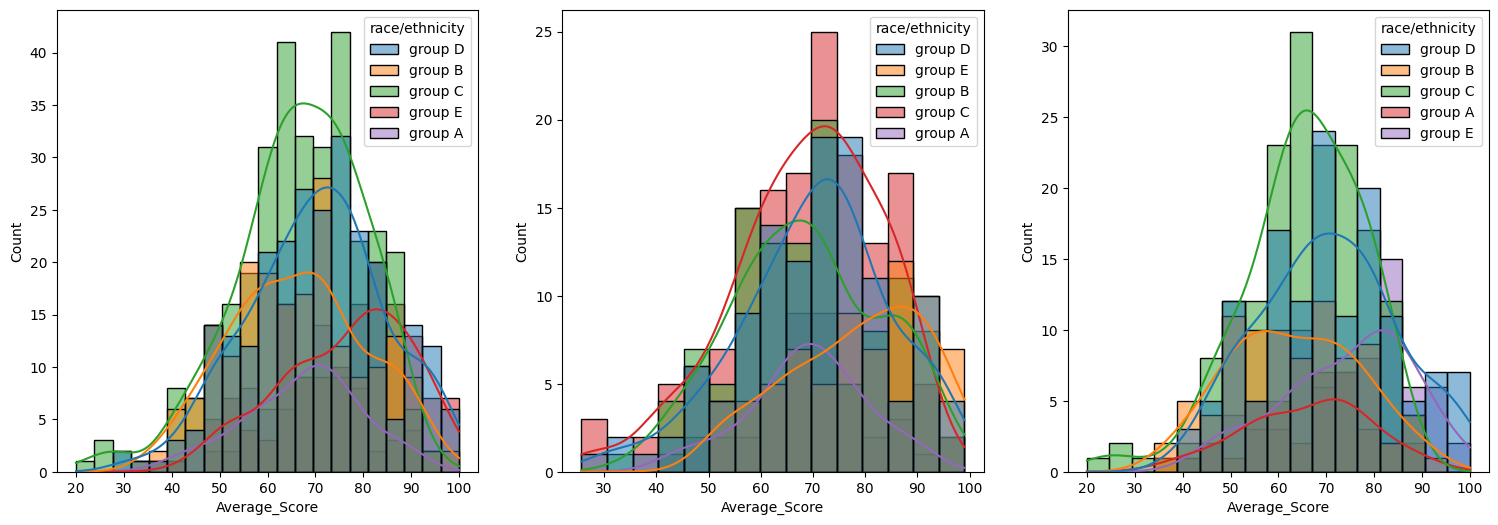

In [44]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average_Score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average_Score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average_Score',kde=True,hue='race/ethnicity')
plt.show()

## Insights
Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

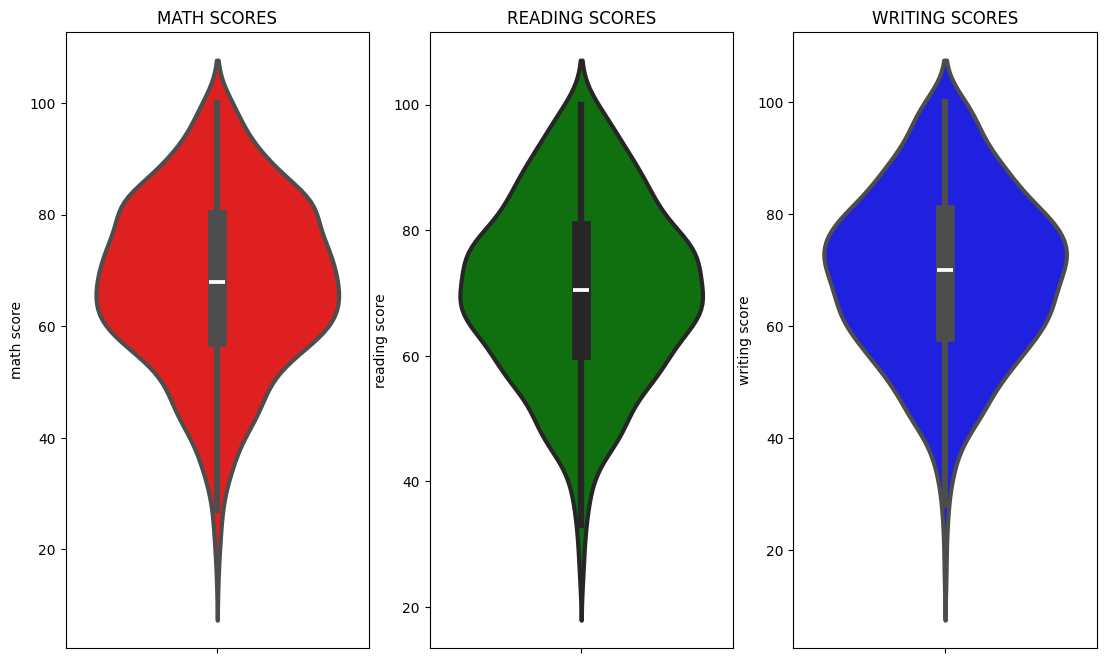

In [45]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

 #### From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

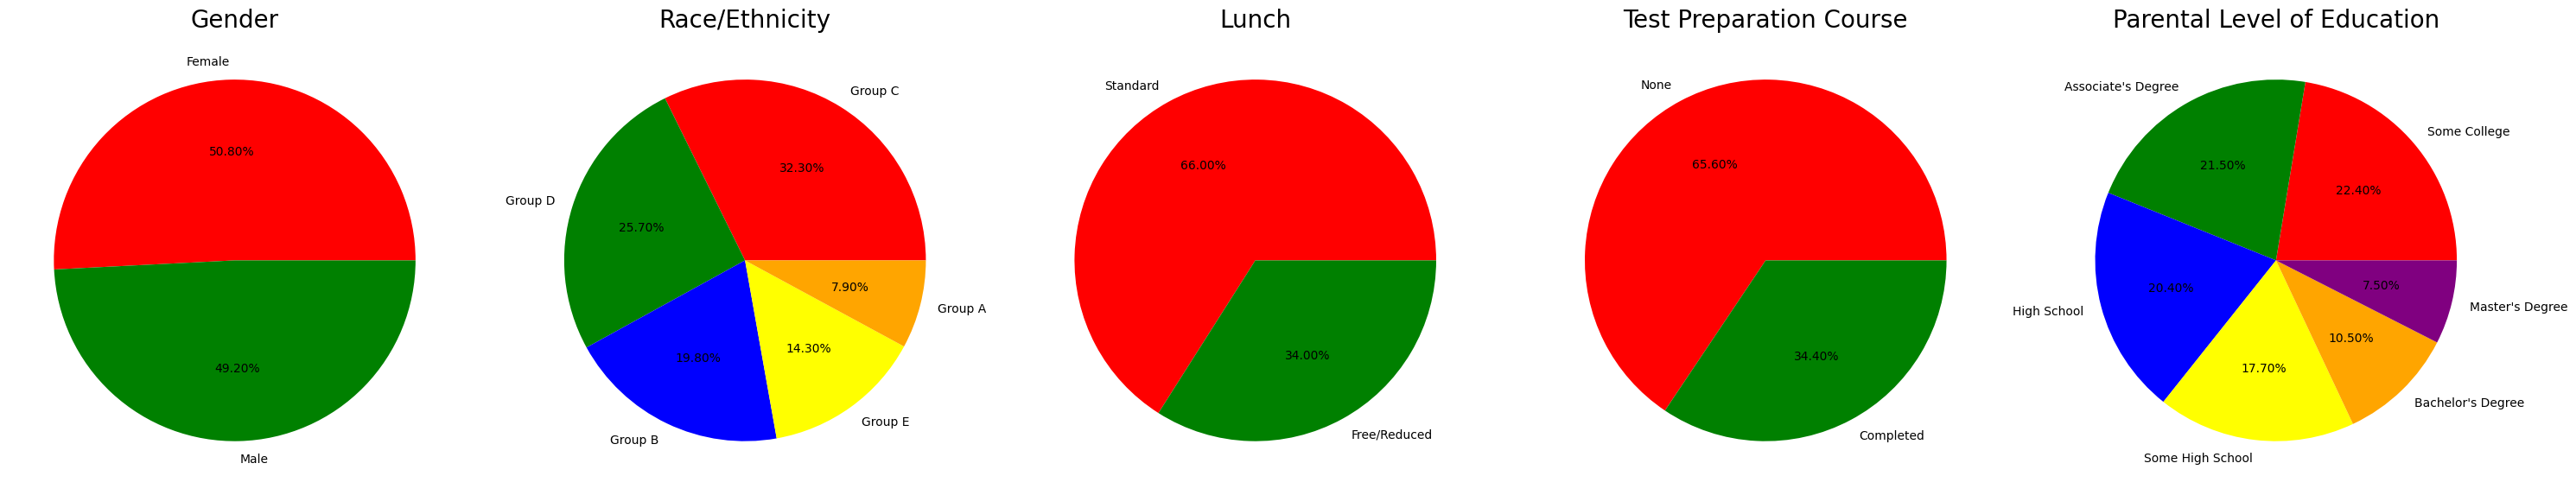

In [46]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot (1, 5, 1)
size  = df['gender'].value_counts()
labels = "Female", "Male"
color = ['red', 'green']

plt.pie(size, labels = labels, colors = color, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot (1, 5, 2)
size  = df['race/ethnicity'].value_counts()
labels = "Group C", "Group D", "Group B", "Group E", "Group A"
color = ['red', 'green', 'blue', 'yellow', 'orange']

plt.pie(size, labels = labels, colors = color, autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot (1, 5, 3)
size  = df['lunch'].value_counts()
labels = "Standard", "Free/Reduced"
color = ['red', 'green']


plt.pie(size, labels = labels, colors = color, autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot (1, 5, 4)

size  = df['test preparation course'].value_counts()
labels = "None", "Completed"
color = ['red', 'green']

plt.pie(size, labels = labels, colors = color, autopct = '%.2f%%')
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')

plt.subplot (1, 5, 5)

size  = df['parental level of education'].value_counts()
labels = "Some College", "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']

plt.pie(size, labels = labels, colors = color, autopct = '%.2f%%')
plt.title('Parental Level of Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

## 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
##### How is distribution of Gender ?
##### Is gender has any impact on student's performance ?

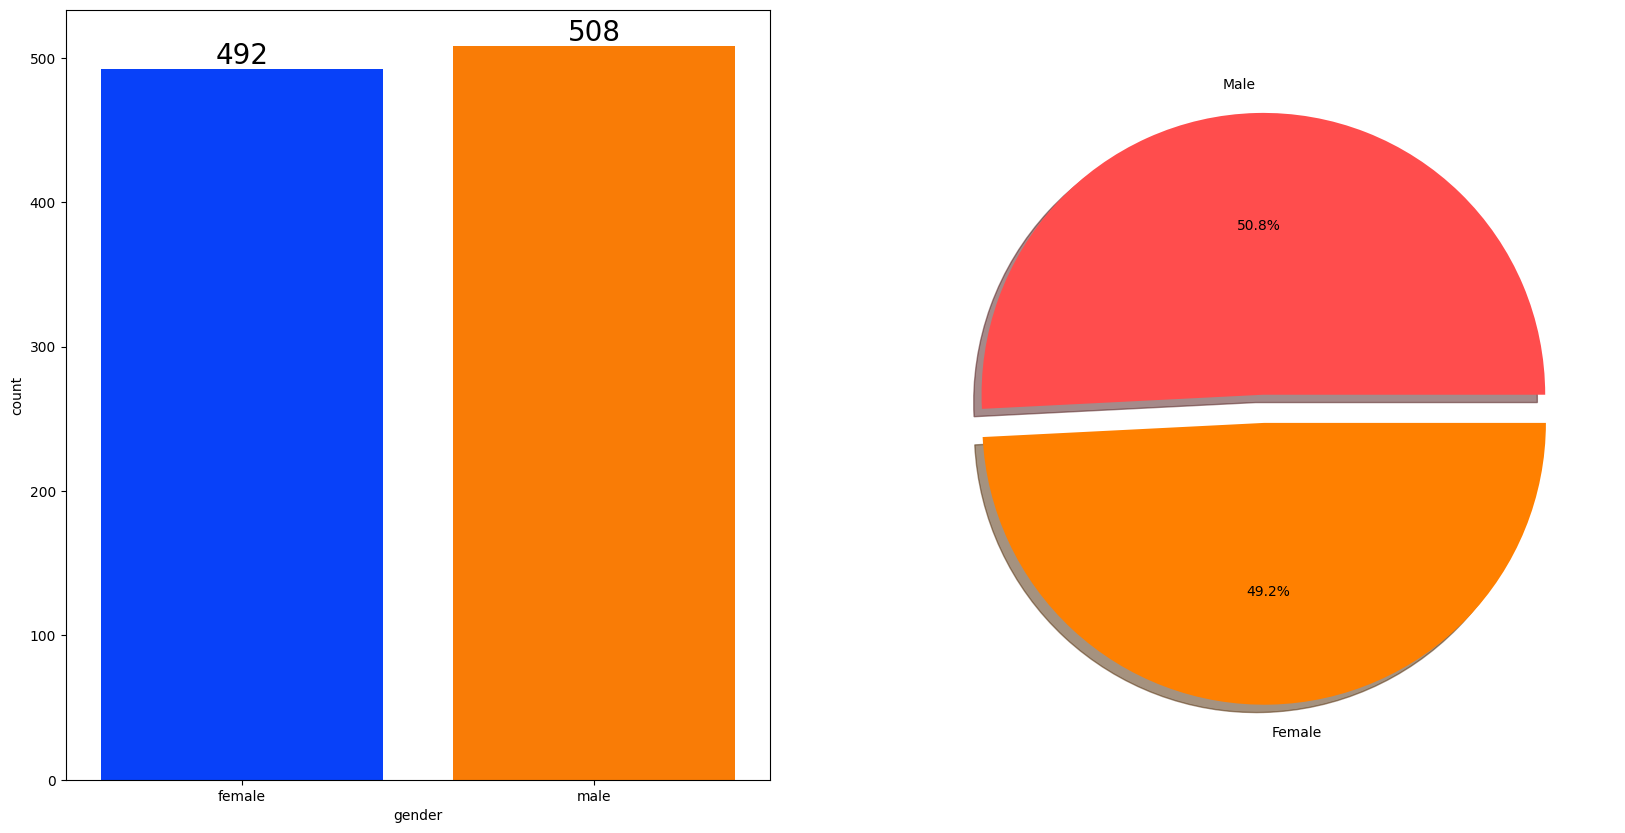

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [64]:
gender_group = df.groupby('gender')[['math score', 'reading score', 'writing score', 'Total_Score', 'Average_Score']].mean()
gender_group

,math score,reading score,writing score,Total_Score,Average_Score
gender,,,,,
female,64.77439,73.473577,73.439024,211.686992,70.562331
male,70.75000,67.387795,64.976378,203.114173,67.704724


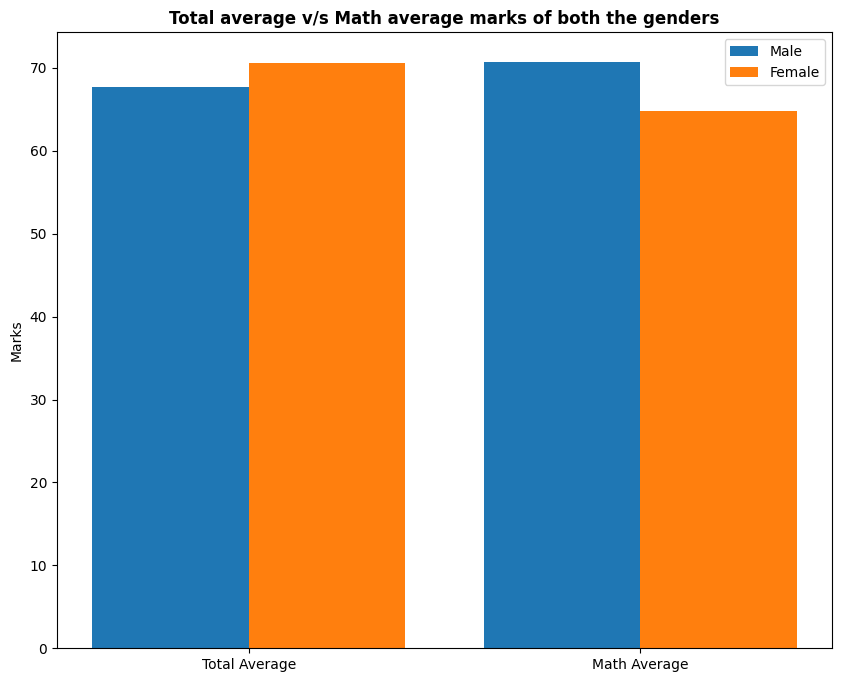

In [65]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average_Score'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average_Score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

## Insights
#### On an average females have a better overall score than men.
#### whereas males have scored higher in Maths.

## 4.4.2 RACE/EHNICITY COLUMN
#### How is Group wise distribution ?
#### Is Race/Ehnicity has any impact on student's performance ?

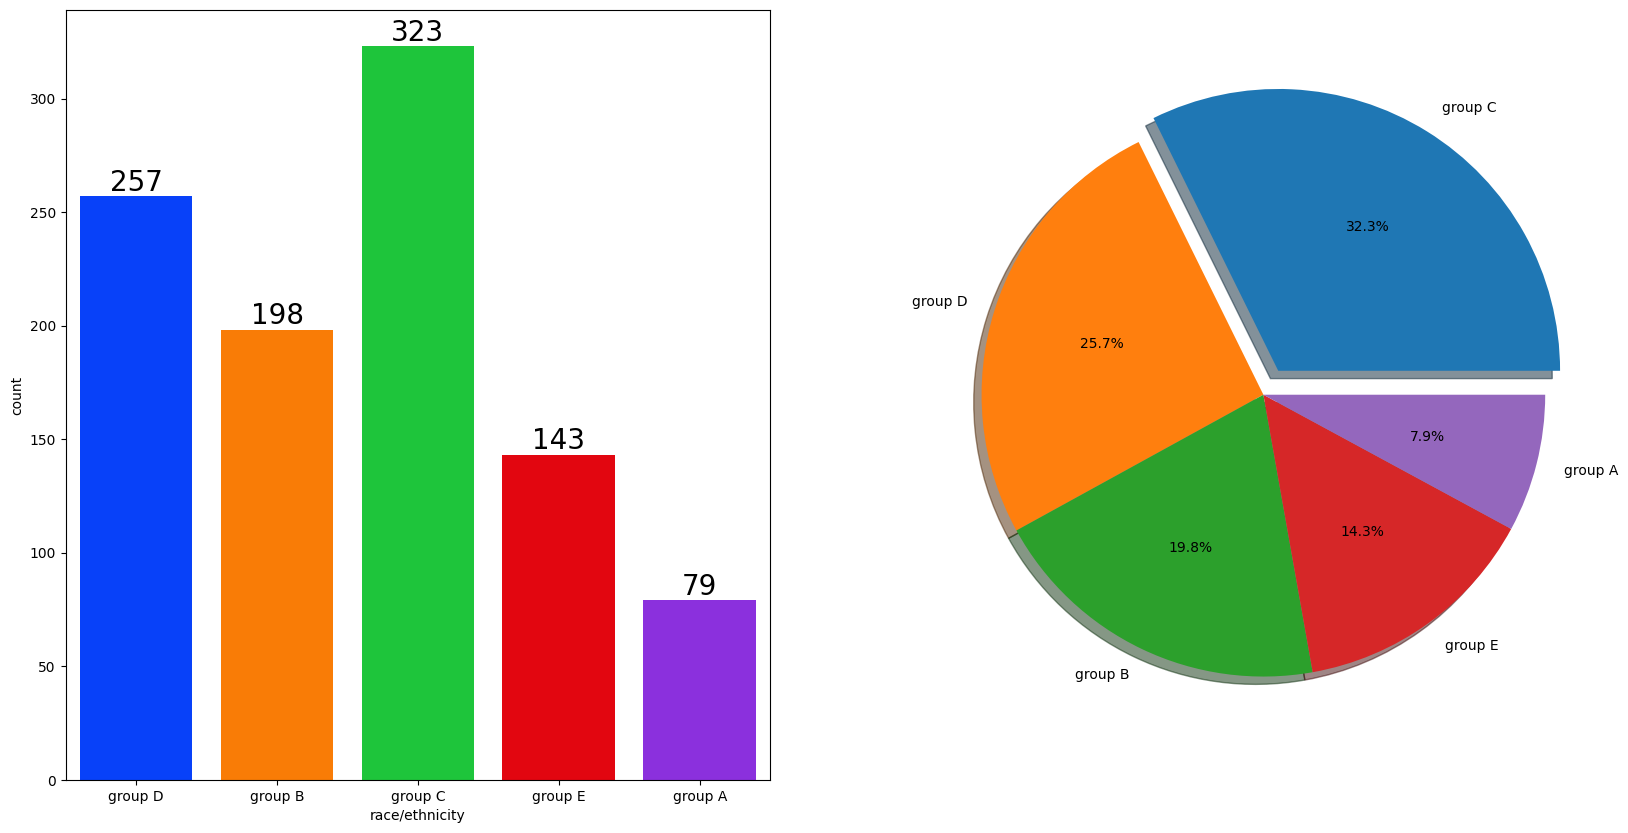

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

## Insights
#### Most of the student belonging from group C /group D.
#### Lowest number of students belong to groupA.

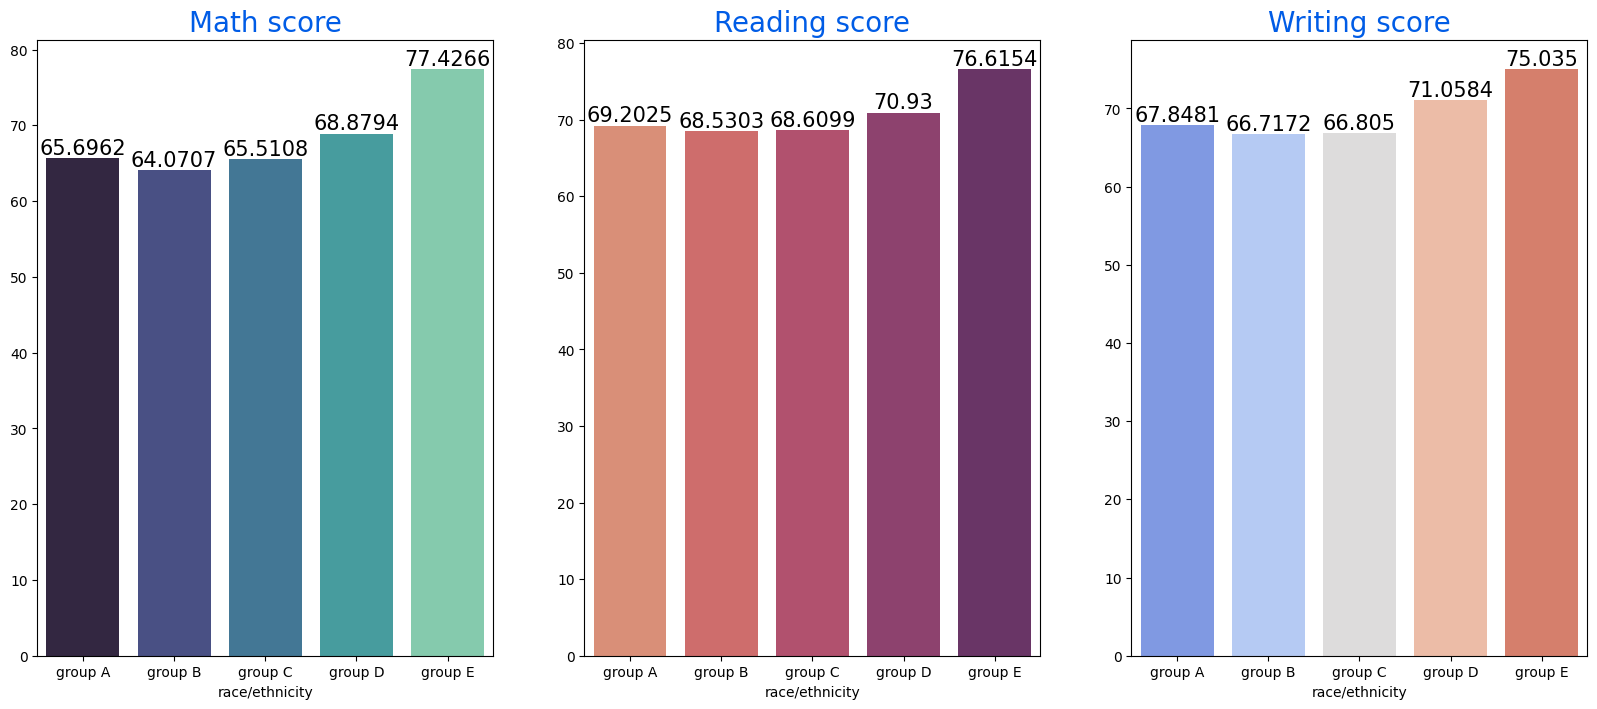

In [67]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## Insights
#### Group E students have scored the highest marks.
#### Group B students have scored the lowest marks.
#### Students from a lower Socioeconomic status have a lower avg in all course subjects

## 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
#### What is educational background of student's parent ?
#### Is parental education has any impact on student's performance ?
## UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

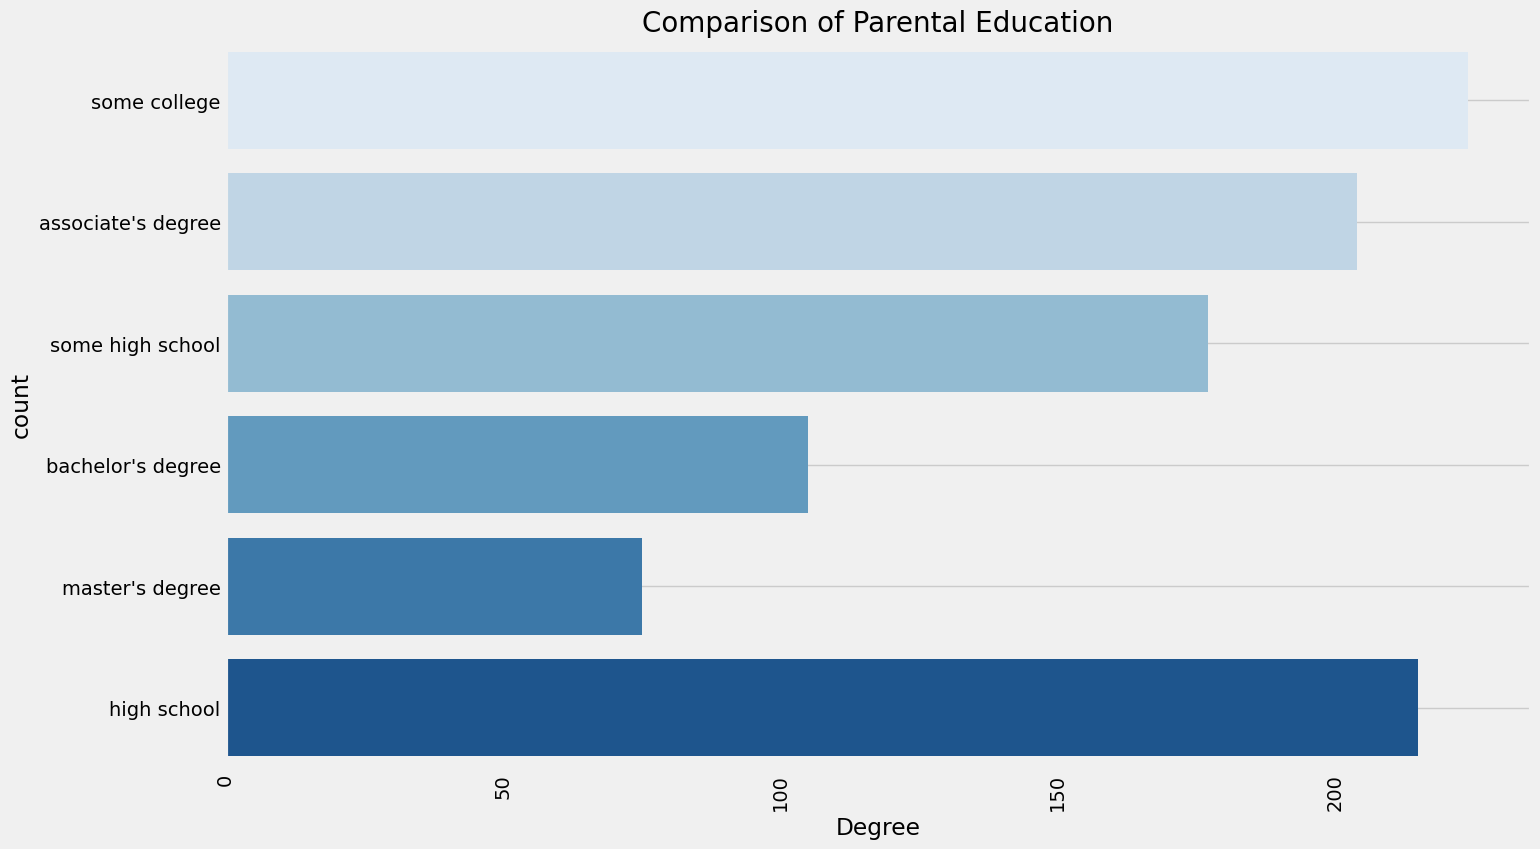

In [70]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

## Insights
#### Largest number of parents are from some college.

## BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )


<Axes: xlabel='parental level of education'>

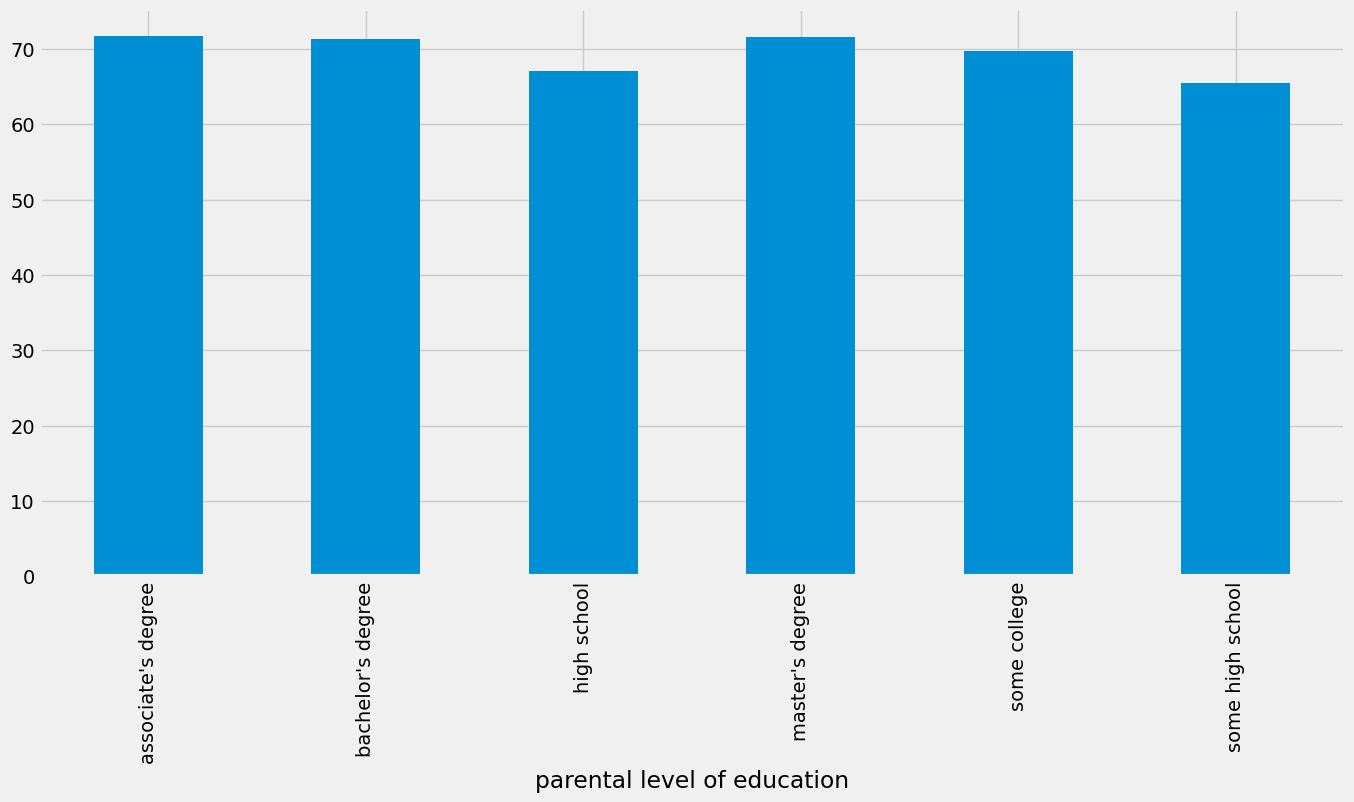

In [74]:
df.groupby('parental level of education')['Average_Score'].mean().plot(kind='bar', figsize=(15, 7))

## Insights
#### The score of student whose parents possess master and bachelor level education are higher than others.

## 4.4.4 LUNCH COLUMN
#### Which type of lunch is most common amoung students ?
#### What is the effect of lunch type on test results?
## UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

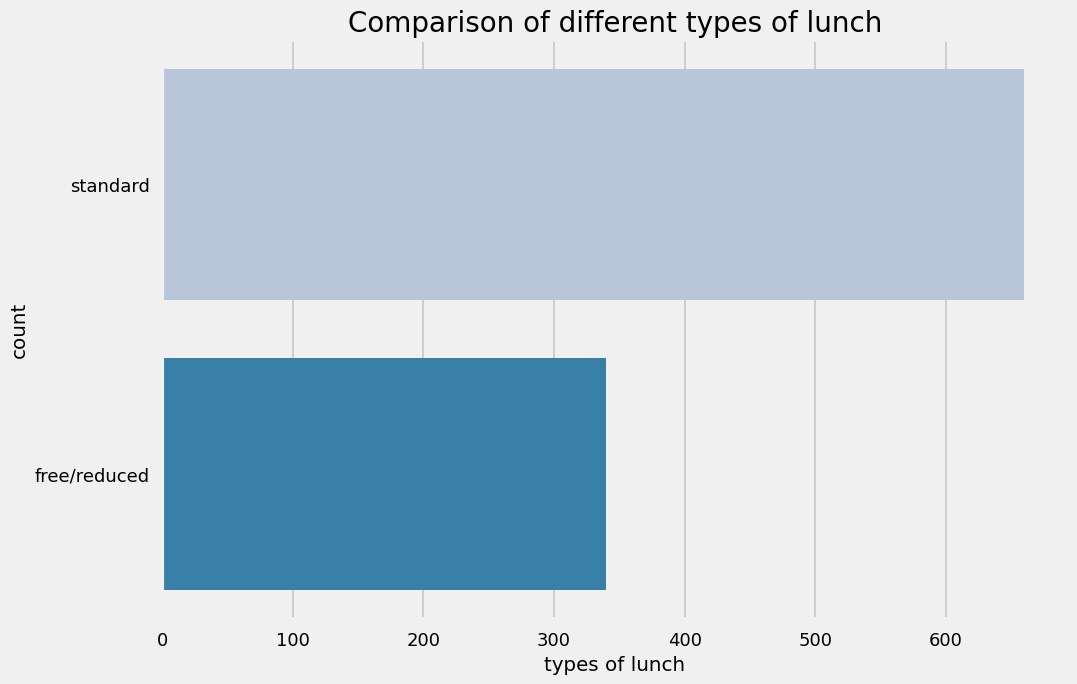

In [75]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

## Insights
#### Students being served Standard lunch was more than free lunch

## BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )


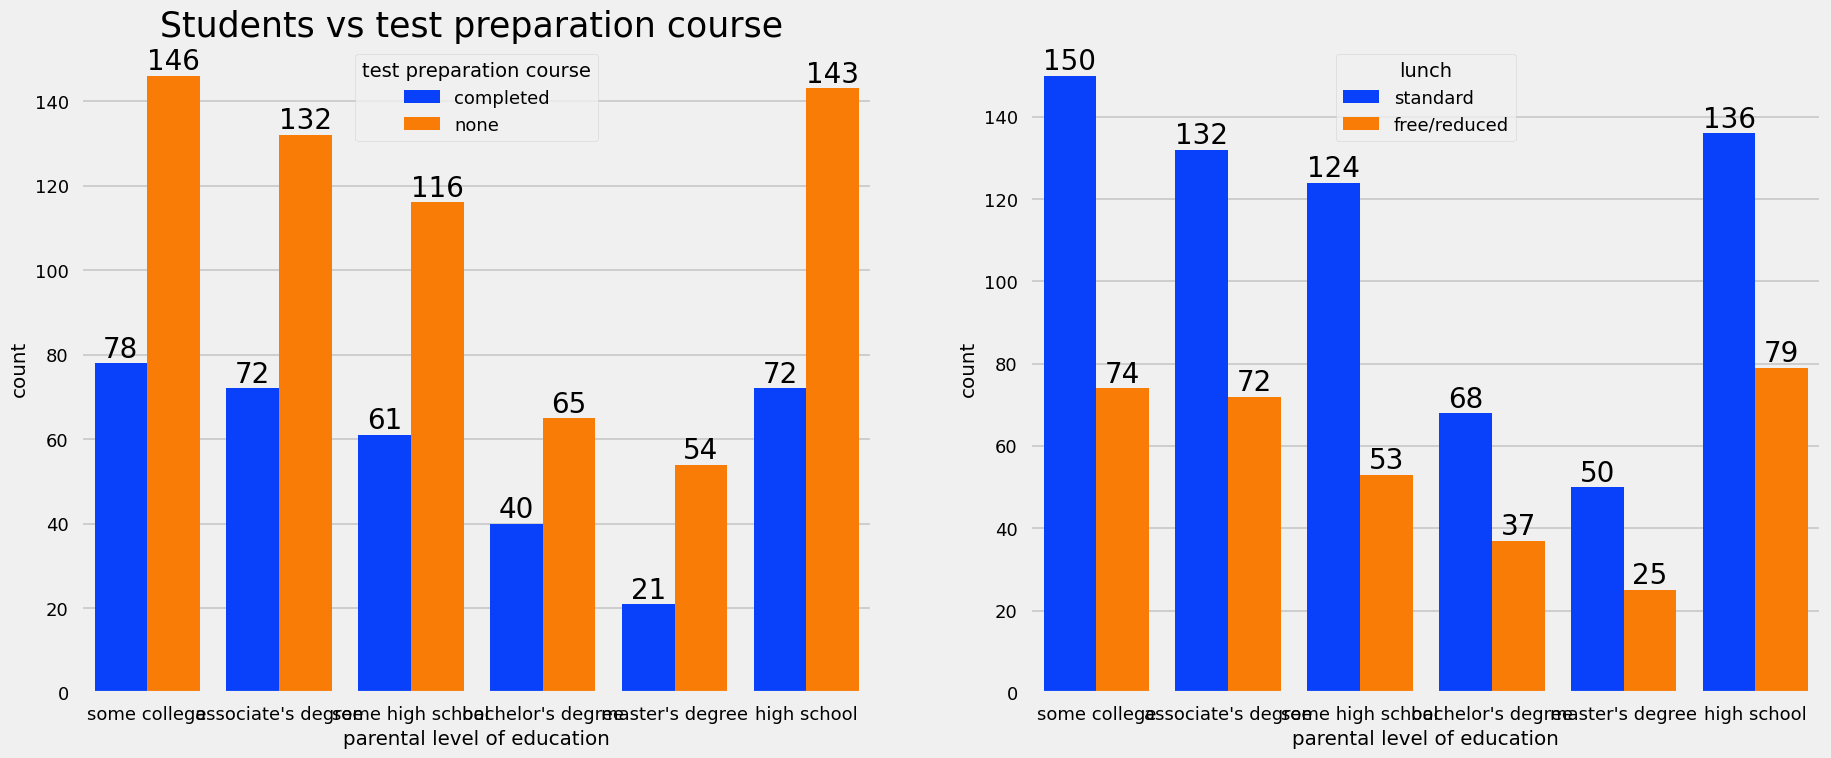

In [76]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

## Insights
#### Students who get Standard Lunch tend to perform better than students who got free/reduced lunch
## 4.4.5 TEST PREPARATION COURSE COLUMN
#### Which type of lunch is most common amoung students ?
#### Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='lunch', ylabel='writing score'>

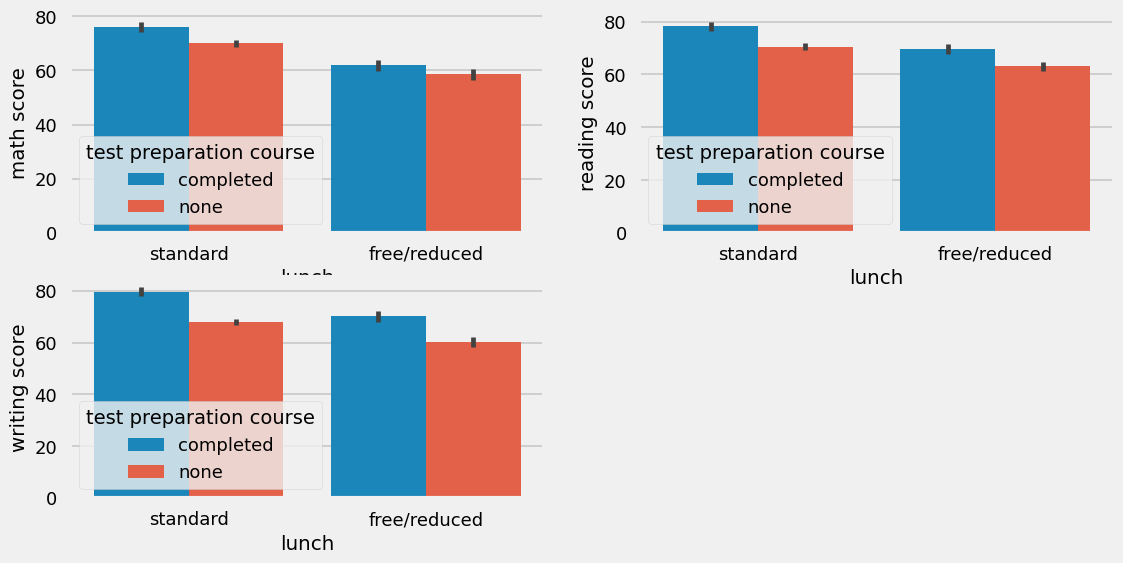

In [77]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

## Insights
#### Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

## 4.4.6 CHECKING OUTLIERS


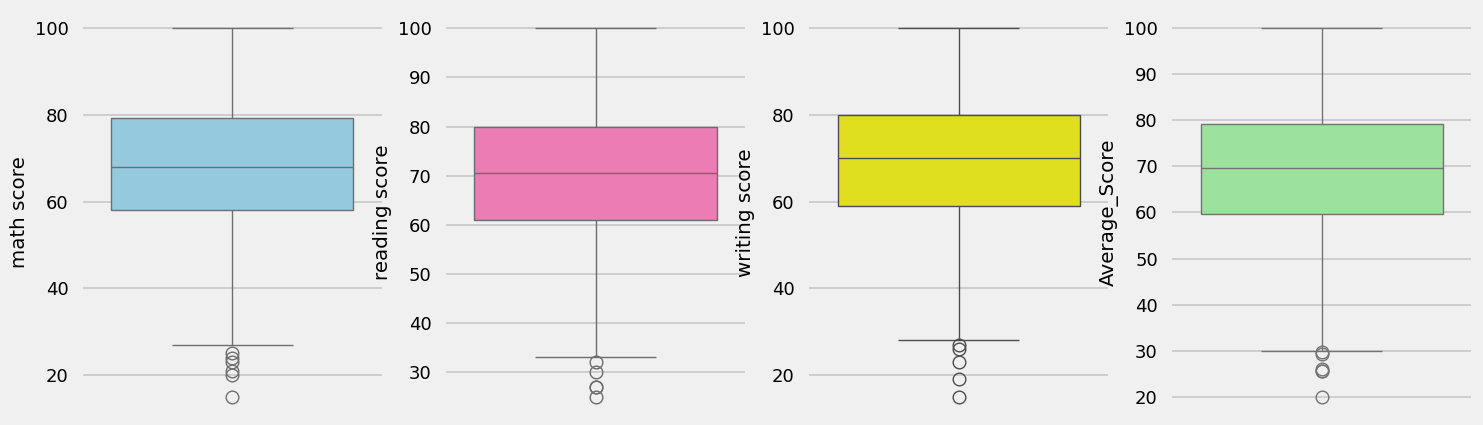

In [79]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_Score'],color='lightgreen')
plt.show()

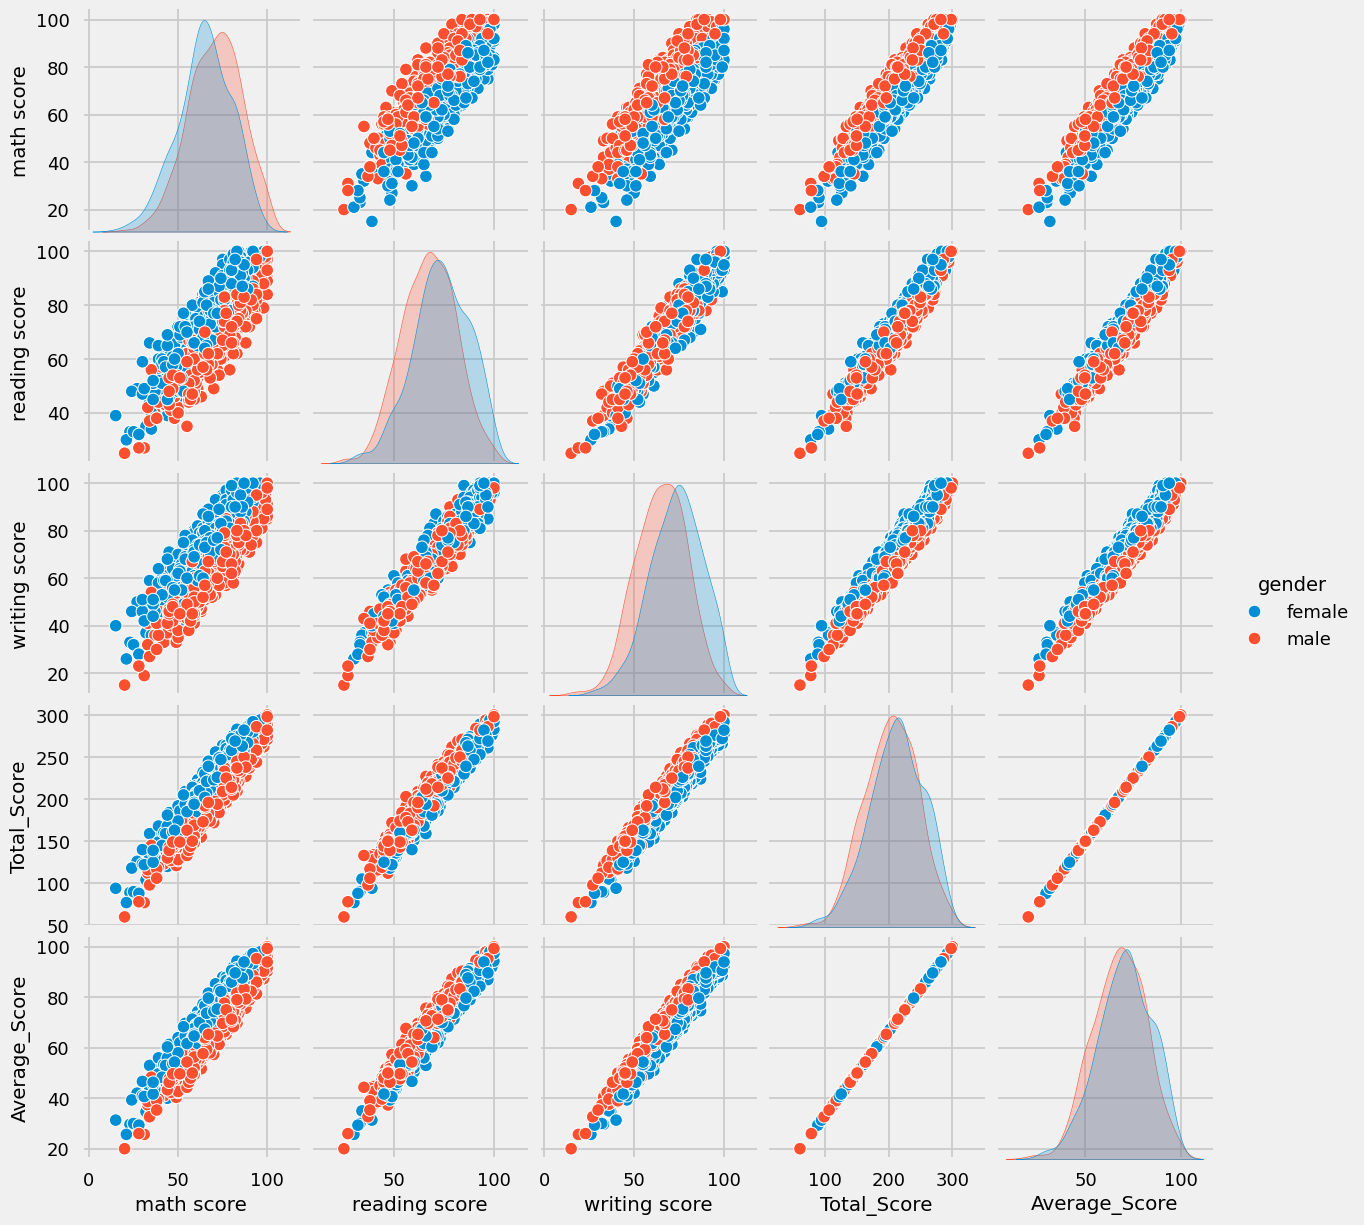

In [80]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Insights
#### From the above plot it is clear that all the scores increase linearly with each other.
# 5. Conclusions
#### Student's Performance is related with lunch, race, parental level education
#### Females lead in pass percentage and also are top-scorers
#### Student's Performance is not much related with test preparation course
#### Finishing preparation course is benefitial.